In [1]:
import nibabel as nib
import numpy as np
from scipy.ndimage import sobel, gaussian_filter
from mayavi import mlab
import matplotlib.pyplot as plt


# Load the NIfTI file
nii_file = 'brain.nii.gz'
img = nib.load(nii_file)

# Get the voxel data as a NumPy array
data = img.get_fdata()

# Smooth the data to reduce noise 
data_smoothed = gaussian_filter(data, sigma=1)

# Normalize the data
data_normalized = (data_smoothed - np.min(data_smoothed)) / (np.max(data_smoothed) - np.min(data_smoothed))

# Compute Sobel gradients in x, y, and z directions
sobel_x = sobel(data_normalized, axis=0)  
sobel_y = sobel(data_normalized, axis=1)  
sobel_z = sobel(data_normalized, axis=2) 

# Compute gradient magnitude
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2 + sobel_z**2)

objc[72026]: Class QT_ROOT_LEVEL_POOL__THESE_OBJECTS_WILL_BE_RELEASED_WHEN_QAPP_GOES_OUT_OF_SCOPE is implemented in both /Users/sjwong/miniconda3/envs/density_env/lib/libQt5Core.5.15.15.dylib (0x11e4252f8) and /Users/sjwong/miniconda3/envs/density_env/lib/libQt6Core.6.7.2.dylib (0x145f69558). One of the two will be used. Which one is undefined.
objc[72026]: Class KeyValueObserver is implemented in both /Users/sjwong/miniconda3/envs/density_env/lib/libQt5Core.5.15.15.dylib (0x11e425320) and /Users/sjwong/miniconda3/envs/density_env/lib/libQt6Core.6.7.2.dylib (0x145f69580). One of the two will be used. Which one is undefined.
objc[72026]: Class RunLoopModeTracker is implemented in both /Users/sjwong/miniconda3/envs/density_env/lib/libQt5Core.5.15.15.dylib (0x11e425370) and /Users/sjwong/miniconda3/envs/density_env/lib/libQt6Core.6.7.2.dylib (0x145f695d0). One of the two will be used. Which one is undefined.


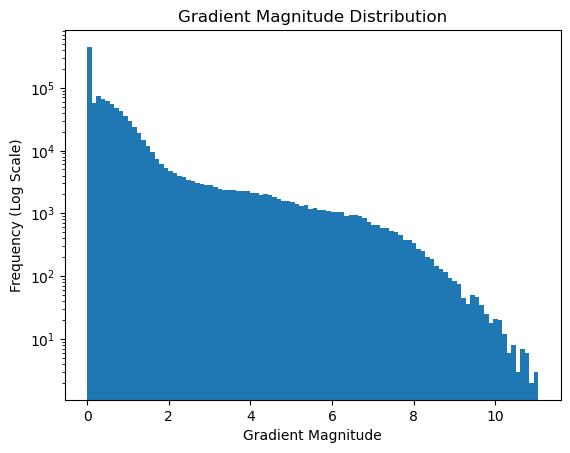

In [ ]:
plt.hist(gradient_magnitude.flatten(), bins=100, log=True)
plt.title("Gradient Magnitude Distribution")
plt.xlabel("Gradient Magnitude")
plt.ylabel("Frequency")
plt.show()

In [3]:
# Adjust threshold calculation to exclude zero values
non_zero_gradients = gradient_magnitude[gradient_magnitude > 0]
low_threshold = np.percentile(non_zero_gradients, 10)  # Lower 10% of non-zero gradients
high_threshold = np.percentile(non_zero_gradients, 45)  # Upper 10% of non-zero gradients

print("Gradient magnitude min:", np.min(gradient_magnitude))
print("Gradient magnitude max:", np.max(gradient_magnitude))
print("Low threshold (non-zero):", low_threshold)
print("High threshold (non-zero):", high_threshold)

# Create masks for zero-density, low-density, and high-density regions
zero_density_mask = gradient_magnitude == 0
low_density_mask = (gradient_magnitude > 0) & (gradient_magnitude < low_threshold)
high_density_mask = gradient_magnitude > high_threshold

print("Zero-density voxel count:", np.sum(zero_density_mask))
print("Low-density voxel count:", np.sum(low_density_mask))
print("High-density voxel count:", np.sum(high_density_mask))

# Combine masks into a single array
# Identify regions with 0 gradient magnitude, which is background and uniform areas
combined_mask = np.zeros_like(gradient_magnitude, dtype=np.float32)
combined_mask[low_density_mask] = 1 
combined_mask[high_density_mask] = 2 

print("Combined mask unique values:", np.unique(combined_mask))


Gradient magnitude min: 0.0
Gradient magnitude max: 11.053035246167925
Low threshold (non-zero): 0.0038335024853794414
High threshold (non-zero): 0.5034569085242393
Zero-density voxel count: 324675
Low-density voxel count: 78413
High-density voxel count: 431269
Combined mask unique values: [0. 1. 2.]


In [ ]:
# zero-density: blue
mlab.contour3d((combined_mask == 0).astype(np.float32), color=(0, 0, 1), opacity=1) 
# low-density: blue
mlab.contour3d((combined_mask == 1).astype(np.float32), color=(1, 1, 0), opacity=1) 
# high-density: red
mlab.contour3d((combined_mask == 2).astype(np.float32), color=(1, 0, 0), opacity=1)  

mlab.title('Low- and High-Density Areas (Blue: Zero, Yellow: Low, Red: High)')
mlab.show()